In [20]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [21]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [22]:
# reviews are limited to 10000 words, each word is represended as some number
max([max(sequence) for sequence in train_data])

# dict {word: index}
word_index = imdb.get_word_index()
# dict {index: word}
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

# indices are offset by 3: 0 is "padding", 1 is "start of sequence", 2 is "unknown"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [23]:
import numpy as np

# turning lists into tensors, one-hot encode (tensor of 0s and 1s, 10000d vector where if word is ther its 1 and if not its 0)
def vectorize_sequences(sequences, dimension = 10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension)) 
    
    # Sets specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

# vectorized training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
from keras import models
from keras import layers

# my input is vectors of 1s and 0s, easy one
# network that performs well with that is: Stack of fully conndected (Dense) layers, with relu activation 

# 16 is number of hidden units, so it will project input onto 16dim representation space
# output = relu(dot(W, input) + b)
# relu is a function meant to zero out negative values
# sigmoid “squashes” arbitrary values into the [0, 1] interval, outputting something that can be interpreted as a probability.

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# binary_crosentropy is good for binary classification and outpu that is probability
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# we split training data so that we can monitor the accuracy of the model on data it hasnt seen before

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# we train for 20 epochs(iterations over all samples), in batches of 512 
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 36ms/step - loss: 0.5081 - accuracy: 0.7802 - val_loss: 0.3972 - val_accuracy: 0.8517
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3024 - accuracy: 0.9035 - val_loss: 0.3071 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2232 - accuracy: 0.9269 - val_loss: 0.3126 - val_accuracy: 0.8740
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1764 - accuracy: 0.9409 - val_loss: 0.2746 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1404 - accuracy: 0.9556 - val_loss: 0.2829 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1182 - accuracy: 0.9633 - val_loss: 0.3184 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0958 - accuracy: 0.9721 - val_loss: 0.3138 - val_accuracy: 0.8812
Epoch 8/20
30

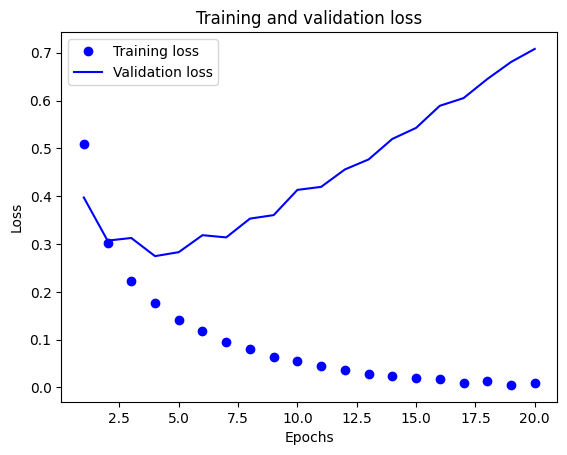

In [32]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo for blue doted line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b for blue solid line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

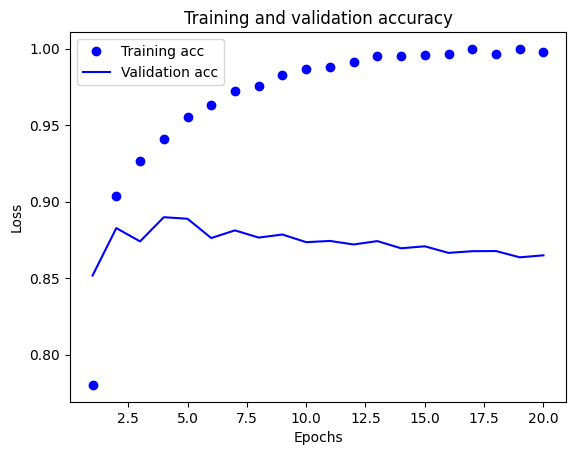

In [34]:
plt.clf()
history_dict.keys()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# We can see the peak around 4-5 epoch, then its lowering, its called overfitting.
# This happens when network is optimizing only for training input

In [35]:
# Lets try for 4 epochs

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4680 - accuracy: 0.8169
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2628 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2014 - accuracy: 0.9287
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3135 - accuracy: 0.8752


[0.31352734565734863, 0.8751599788665771]

In [36]:
# now lets use model on test set, input it hasnt seen

model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.28786838],
       [0.9999732 ],
       [0.979607  ],
       ...,
       [0.17914595],
       [0.12561361],
       [0.77847135]], dtype=float32)

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5045 - accuracy: 0.7993 - val_loss: 0.3928 - val_accuracy: 0.8731
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3196 - accuracy: 0.9037 - val_loss: 0.3202 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2471 - accuracy: 0.9225 - val_loss: 0.3011 - val_accuracy: 0.8827
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2027 - accuracy: 0.9370 - val_loss: 0.2786 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1730 - accuracy: 0.9479 - val_loss: 0.2917 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1490 - accuracy: 0.9554 - val_loss: 0.2871 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1302 - accuracy: 0.9625 - val_loss: 0.3140 - val_accuracy: 0.8751
Epoch 8/20
30

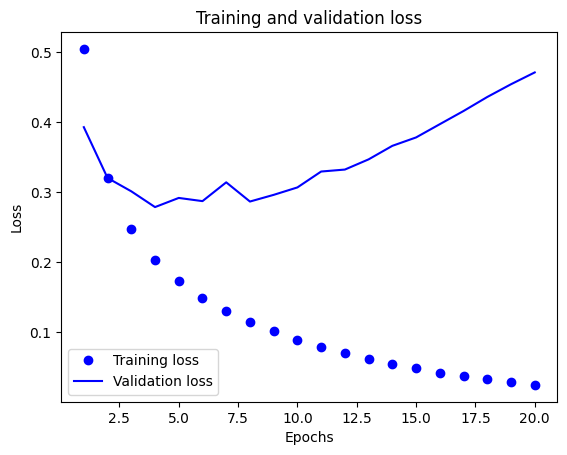

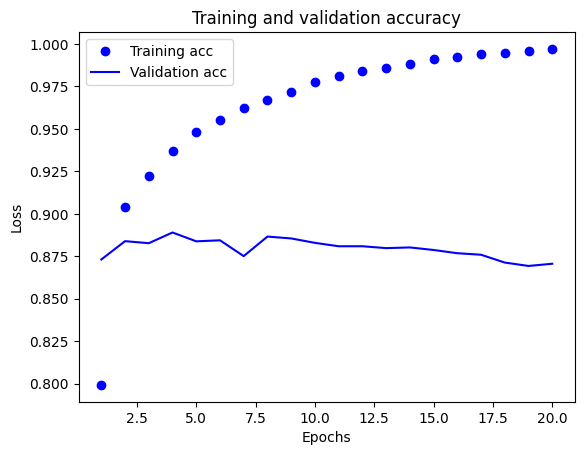

In [38]:
#EXPERIMENT 1 - one hidden layer
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo for blue doted line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b for blue solid line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
history_dict.keys()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# validation acc doesnt have this peak at epoch 4

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5631 - accuracy: 0.7664 - val_loss: 0.4249 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3346 - accuracy: 0.8957 - val_loss: 0.3384 - val_accuracy: 0.8628
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2330 - accuracy: 0.9232 - val_loss: 0.2779 - val_accuracy: 0.8933
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1798 - accuracy: 0.9408 - val_loss: 0.2991 - val_accuracy: 0.8807
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1427 - accuracy: 0.9531 - val_loss: 0.2930 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1170 - accuracy: 0.9616 - val_loss: 0.2989 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0938 - accuracy: 0.9709 - val_loss: 0.3540 - val_accuracy: 0.8774
Epoch 8/20
30

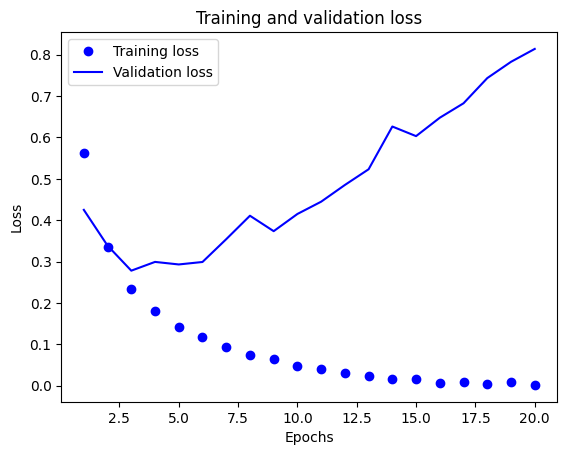

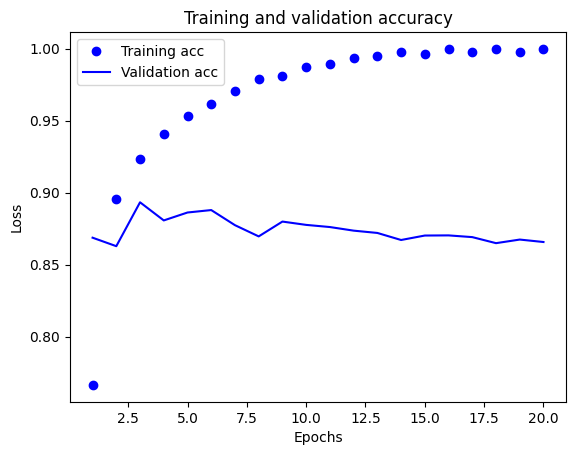

In [39]:
#EXPERIMENT 2 - three hidden layers
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo for blue doted line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b for blue solid line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
history_dict.keys()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#validation loss is bigger?

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4876 - accuracy: 0.7647 - val_loss: 0.3302 - val_accuracy: 0.8737
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2597 - accuracy: 0.9041 - val_loss: 0.2798 - val_accuracy: 0.8913
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1959 - accuracy: 0.9267 - val_loss: 0.2772 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1467 - accuracy: 0.9467 - val_loss: 0.2893 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0952 - accuracy: 0.9681 - val_loss: 0.4782 - val_accuracy: 0.8457
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0816 - accuracy: 0.9694 - val_loss: 0.4008 - val_accuracy: 0.8674
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.3856 - val_accuracy: 0.8789
Epoch 8/20
30

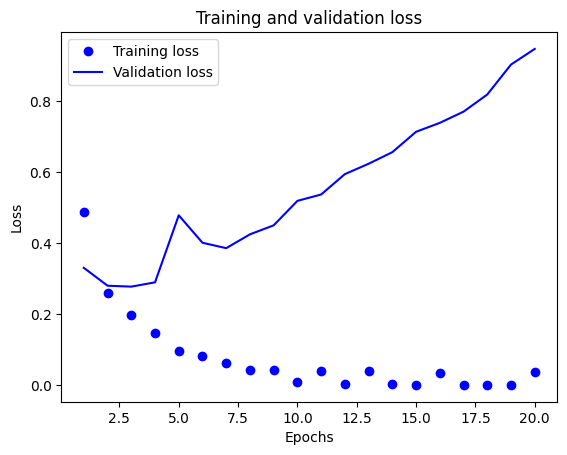

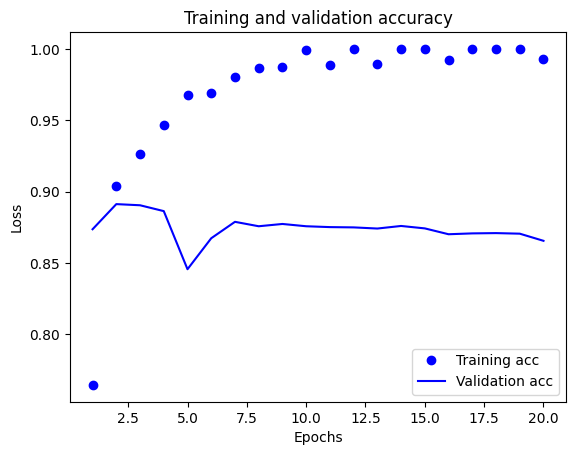

In [41]:
#EXPERIMENT 4 - 64 hidden units
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo for blue doted line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b for blue solid line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
history_dict.keys()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#some weird bumps, validation acc pretty flat
